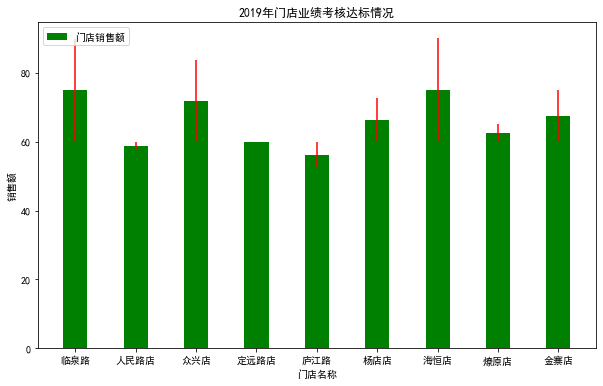

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pymysql
mpl.rcParams['font.sans-serif']=['SimHei']

#连接Hadoop数据库
v1 = []
v2 = []
v3 = []
conn = pymysql.connect(host='lylg102',port=3306,user='root',password='000000',db='test',charset='utf8')
cursor = conn.cursor()

#读取Hadoop订单表数据
sql_num = "SELECT store_name,SUM(sales)/10000,SUM(sales)/10000-60.00 FROM orders WHERE dt=2019 GROUP BY store_name"
cursor.execute(sql_num)
sh = cursor.fetchall()
for s in sh:
    v1.append(s[0])
    v2.append(s[1])
    v3.append(s[2])

plt.figure(figsize=(10,6))      #设置图形大小
plt.bar(v1, v2, yerr=v3, width=0.4, align='center', ecolor='r', color='green', label='门店销售额');

#添加坐标标签
plt.xlabel('门店名称')
plt.ylabel('销售额')
plt.title('2019年门店业绩考核达标情况')
plt.legend(loc='upper left')
plt.show()